In [70]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [71]:
from prophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [50]:
df_acum= pd.read_excel('df_definitivo.xlsx')

In [51]:
df_acum

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417","1,799",No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389","1,869",No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
2,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 5","-1,846361","38,997722",No disponible,No disponible,No disponible,"1,889",No disponible,CEPSA,L-S: 05:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667","1,809",No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694","1,769",No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221502,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"POLIGONO CALLE TURIASO, 31","-0,974194","41,645722",No disponible,No disponible,No disponible,"1,889",No disponible,NOIL,L-D: 24H,26-04-2022
221503,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"RONDA FERIA DE MUESTRAS, DE LA, 20","-0,986389","41,637944",No disponible,No disponible,No disponible,"1,889",No disponible,IDS,L-D: 24H,26-04-2022
221504,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000","1,829",No disponible,"1,959","1,859","1,929",REPSOL,L-D: 06:00-22:00,26-04-2022
221505,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583","1,799",No disponible,No disponible,"1,809","1,849",COOPERATIVA SAN LICER,L-D: 24H,26-04-2022


In [52]:
price_today= pd.read_excel('price_today.xlsx')


In [72]:
price_today = price_today.sort_values('Distance')
price_head=price_today.head(10)
price_head

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción,Latitud_partida,Longitud_partida,mercator_start,mercator_finish,Distance
6725,MADRID,Madrid,MADRID,28029,"CL MONFORTE DE LEMOS, 7",-3.691194,40.477556,"1,904","1,984","2,036","1,929","2,009",CEPSA,L-D: 07:00-23:00,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505940.922476215 -411186.3653054542),1123.707543
6655,MADRID,Madrid,MADRID,28046,"CL PASEO CASTELLANA, 276",-3.686333,40.474833,"1,879",No disponible,"1,999","1,909","1,999",REPSOL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505637.799502784 -410644.1178619877),1165.060834
6724,MADRID,Madrid,MADRID,28029,"AVENIDA MONFORTE DE LEMOS, 10",-3.697889,40.479861,"1,879",No disponible,No disponible,"1,919","1,969",REPSOL,L-V: 07:00-22:00; S: 09:00-15:00,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4506197.513902494 -411933.2014001492),1599.801758
6699,MADRID,Madrid,MADRID,28036,"AVENIDA PÍO XII, 98",-3.675528,40.472556,"1,889",No disponible,"1,999","1,909","1,999",REPSOL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4505384.325022249 -409438.8242909524),1725.549903
6736,MADRID,Madrid,MADRID,28034,"CALLE CARDENAL HERRERA ORIA, 81",-3.700583,40.489056,"1,879",No disponible,"2,019","1,899","1,979",SHELL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4507221.096620337 -412233.7222499723),1840.447896
6738,MADRID,Madrid,MADRID,28034,"CL NUESTRA SEÑORA DE VALVERDE, 175",-3.685333,40.503444,"1,879",No disponible,"2,009","1,919","1,989",REPSOL,L-D: 06:00-22:00,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508822.761453873 -410532.5676344641),2038.817755
6698,MADRID,Madrid,MADRID,28036,"CL MATEO INURRIA, 4",-3.685750,40.466667,"1,879","1,929","2,029","1,919","2,009",REPSOL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4504728.764540968 -410579.0840640963),2061.372927
6734,MADRID,Madrid,MADRID,28034,"CARRETERA COLMENAR VIEJO KM. 10,5",-3.697806,40.499500,"1,890",No disponible,"2,010","1,920","1,980",REPSOL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508383.717382183 -411923.9426059921),2176.957616
6711,MADRID,Madrid,MADRID,28050,"AVENIDA MANOTERAS, 34",-3.665083,40.487861,"1,879",No disponible,"2,059","1,899","1,999",CEPSA,L-D: 06:00-23:59,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4507088.06982884 -408273.702460632),2192.722679
6733,MADRID,Madrid,MADRID,28034,"CARRETERA COLMENAR VIEJO KM. 10,5",-3.697972,40.500000,"1,890",No disponible,No disponible,"1,920","1,980",REPSOL,L-D: 24H,26-04-2022,40.485146,-3.684552,POINT (4506785.804015489 -410445.4916140108),POINT (4508439.377127579 -411942.460195173),2230.519888


In [96]:
df_prección=[]
direccion_gasolineras=list(price_head['Dirección'].unique())
for i in direccion_gasolineras:
    df_prección.append(df_acum[df_acum.Dirección.isin([i])])
    for j in range(10):
        # meter aqui todo el código con el número 5 pero con i

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
6624,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,809",No disponible,"1,909","1,839","1,909",REPSOL,L-D: 24H,04-04-2022
18247,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,809",No disponible,"1,909","1,839","1,909",REPSOL,L-D: 24H,05-04-2022
29894,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,09-04-2022
41541,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,10-04-2022
53207,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,11-04-2022
64890,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,12-04-2022
76589,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,14-04-2022
88279,MADRID,MADRID,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,15-04-2022
99950,MADRID,Madrid,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,16-04-2022
111608,MADRID,Madrid,MADRID,28046,"CL PASEO CASTELLANA, 276","-3,686333","40,474833","1,819",No disponible,"1,939","1,839","1,909",REPSOL,L-D: 24H,17-04-2022


In [74]:
df_prección[5]['Precio gasolina 95 E5'] = df_prección[5]['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_prección[5]['Precio gasóleo A'] = df_prección[5]['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
df_prección[5]['Precio gasolina 95 E5']=df_prección[5]['Precio gasolina 95 E5'].astype('float64')
df_prección[5]['Precio gasóleo A']=df_prección[5]['Precio gasóleo A'].astype('float64')

In [75]:
df_prophet_gasolina = pd.DataFrame()
df_prophet_gasolina['ds'] = df_prección[5]['Fecha de extracción']
df_prophet_gasolina['y'] = df_prección[5]['Precio gasolina 95 E5']
df_prophet_gasolina.head()

,ds,y
6706,04-04-2022,1.809
18330,05-04-2022,1.809
29975,09-04-2022,1.809
41621,10-04-2022,1.809
53289,11-04-2022,1.809


In [76]:
format_data = '%d-%m-%Y'
df_prophet_gasolina['ds']=df_prophet_gasolina['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))



In [77]:
df_prophet_gasolina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 6706 to 216591
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      19 non-null     datetime64[ns]
 1   y       19 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 456.0 bytes


In [78]:

#df_prophet_gasolina['ds'] = pd.to_datetime(df_grafico[0]['Fecha de extracción']) 

#df_prophet_gasolina['ds'] = datetime.datetime.strptime(df_prophet_gasolina['ds'],'%Y/%m/%d')


df_prophet_gasolina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 6706 to 216591
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      19 non-null     datetime64[ns]
 1   y       19 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 456.0 bytes


In [79]:
df_prophet_gasolina

,ds,y
6706,2022-04-04,1.809
18330,2022-04-05,1.809
29975,2022-04-09,1.809
41621,2022-04-10,1.809
53289,2022-04-11,1.809
64970,2022-04-12,1.809
76668,2022-04-14,1.829
88362,2022-04-15,1.849
100032,2022-04-16,1.859
111689,2022-04-17,1.859


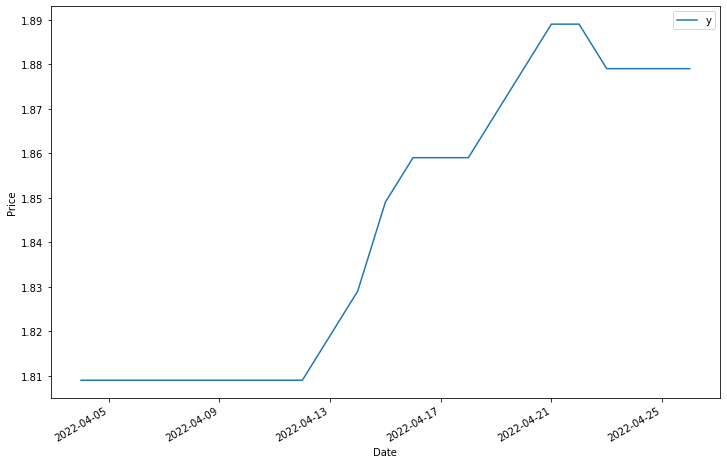

In [80]:
#ax = df_prophet_gasolina.set_index('ds').plot(figsize=(12, 8))
#ax.set_ylabel('Price')
#ax.set_xlabel('Date')

#plt.show()

In [88]:
my_model = Prophet(interval_width=0.8)


In [89]:
my_model.fit(df_prophet_gasolina)


2022-04-26 20:56:18.064 INFO    prophet: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-04-26 20:56:18.066 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-04-26 20:56:18.103 INFO    prophet: n_changepoints greater than number of observations. Using 14.


In [90]:
future = my_model.make_future_dataframe(periods=7)
future

,ds
0,2022-04-04
1,2022-04-05
2,2022-04-09
3,2022-04-10
4,2022-04-11
5,2022-04-12
6,2022-04-14
7,2022-04-15
8,2022-04-16
9,2022-04-17


In [91]:
predict= my_model.predict(future)
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

,ds,yhat,yhat_lower,yhat_upper
18,2022-04-26,1.879000,1.879000,1.879000
19,2022-04-27,1.880362,1.878357,1.882226
20,2022-04-28,1.889894,1.881507,1.897045
21,2022-04-29,1.889845,1.874132,1.904433
22,2022-04-30,1.879845,1.854174,1.904162
23,2022-05-01,1.879845,1.843751,1.914605
24,2022-05-02,1.879845,1.832023,1.925801
25,2022-05-03,1.879845,1.818481,1.938482


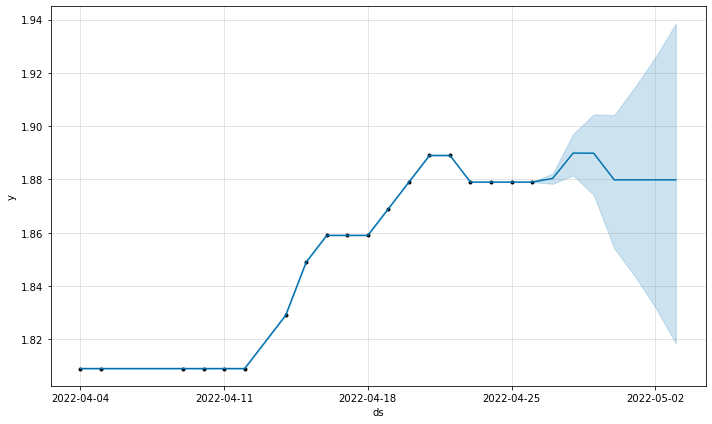

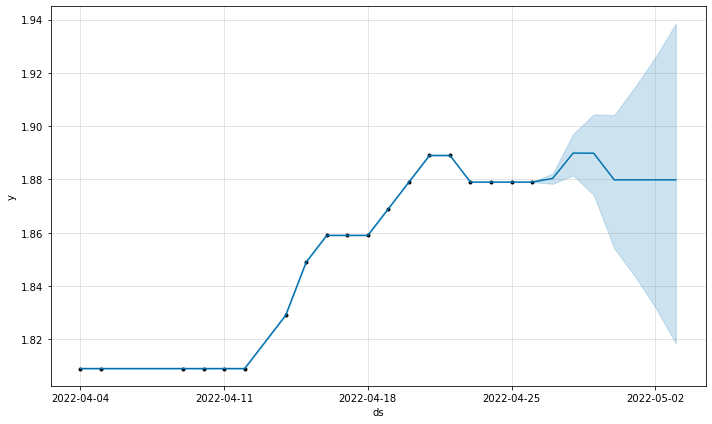

In [92]:
my_model.plot(predict, uncertainty=True)

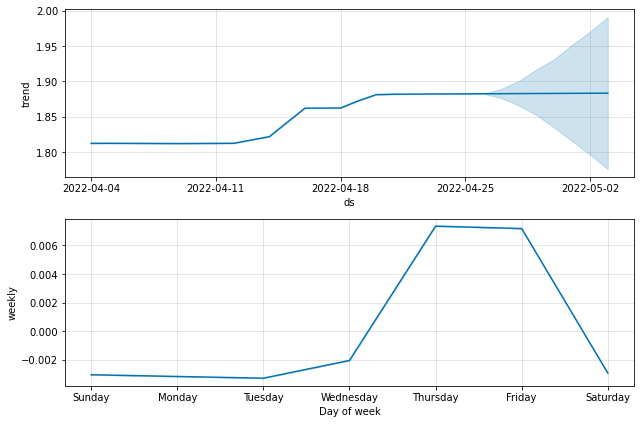

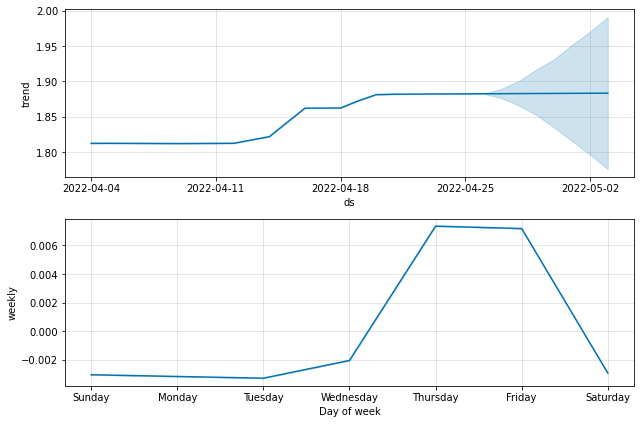

In [87]:
my_model.plot_components(predict)